## Интерполяция функций

### План

 - Интерполяционный многочлен
 - Задача полиноминальной интерполяции на Python
 - Пример аппроксимации формулой Тейлора и порядок аппроксимации
 - Ошибки усечения и округления, ограничения на порядок аппроксимации
 - Интерполяционный полином Эрмита и сплайны
 - Полиномы Чебышева

 - Устранение шума из данных*
 - Интерполяция и экстраполяция аналитической функции и её производных*

__Интерполяция__ — вид аппроксимации, в котором кривая точно проходит через имеющиеся точки данных. Заменяет дискретный ряд значений непрерывной функцией внутри рассматриваемого промежутка.

__Дискретизация__ – это замена непрерывной функции на таблицу значений в конечном количестве точек или на каком-либо дискретном множестве.

Основные виды задач интерполяции:  
 - Нахождение промежуточного значения между двумя точками на кривой
 - Построение гладкой кривой, соединяющей точки с известными значениями
 - Получение непрерывной функции на основе входных данных, в которой устранено влияние шума
 - Нахождение многочлена, хорошим образом приближающим функцию на отрезке (а не только в окрестности точки)


 __Суть интерполяции__ - найти "хороший" многочлен, которые проходит через заданные точки функции (тем самым "аля" её приближая). Тут главное не взять слишком много точек, а то получится ситуация сходная с переобучением в задаче регрессии.

### Интерполяционный многочлен


Пусть на отрезке $[a, b]$ есть сетка значений $ x_0 < x_1 < ... < x_n $, в которой известны значения функции $f$: $y_0 = f(x_0), y_1 = f(x_1)$, ... .

Хотим найти многочлен $L(x)$, проходящий через точки $\{ (x_i, y_i) \}_{i=0}^{n}$. Есть надежда, что $L(x)$ будет близок к $f(x)$ на всём отрезке $[a, b]$. Назовём $L(x)$  __интерполяционным многочленом__.


Нахождение многочлена $n$-й степени, проходящего через $n+1$ заданную точку - задача со школы (ну или с 1 семестра). Достаточно решить систему линейных уравнений на $a_i$:

$$\left\{\begin{array}{l}
a_{0}+a_{1} x_{0}+a_{2} x_{0}^{2}+\cdots+a_{n} x_{0}^{n}=y_{0} \\
a_{0}+a_{1} x_{1}+a_{2} x_{1}^{2}+\cdots+a_{n} x_{1}^{n}=y_{1} \\
\cdots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \\
a_{0}+a_{1} x_{n}+a_{2} x_{n}^{2}+\cdots+a_{n} x_{n}^{n}=y_{n}
\end{array}\right.$$

Её можно переписать в матричном виде: $Xa = y$:

$$
\left[\begin{array}{ccccc}
1 & x_{0} & x_{0}^{2} & \ldots & x_{0}^{n} \\
1 & x_{1} & x_{1}^{2} & \ldots & x_{1}^{n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n} & x_{n}^{2} & \ldots & x_{n}^{n}
\end{array}\right]\left[\begin{array}{c}
a_{0} \\
a_{1} \\
\vdots \\
a_{n}
\end{array}\right]=\left[\begin{array}{c}
y_{0} \\
y_{1} \\
\vdots \\
y_{n}
\end{array}\right]
$$

После нахождения $a_i$, итоговый интерполяционный многочлен будет иметь вид:

$$
L_n(x) = a_{0}+a_{1} x +a_{2} x^{2}+\cdots+a_{n} x^{n}
$$

### Самые распространённые формы записи интерполяционного многочлена:

Решать систему выше можно, но абсолютно не нужно. Она решена в общем виде до нас, и интерполяционный многочлен можно написать сразу же, как известны набор точек $\{ (x_i, y_i) \}_{i=0}^{n}$, правда будет записан он хитро.

Популярны две записи:

 - __Многочлен Лагранжа__ — удобен для теоретических исследований, оценок погрешностей, доказательства теорем и аналитических расчетов (в том числе с sympy), но неудобен с точки зрения численных расчётов:

\begin{aligned}
&L_n(x)=\sum_{i=0}^{n} y_{i} \cdot l_{i}(x) \\
& \\
&l_{i}(x)=\prod_{j=0, \; j \neq i}^{n} \frac{x-x_{j}}{x_{i}-x_{j}}=\frac{x-x_{0}}{x_{i}-x_{0}} \cdots \frac{x-x_{i-1}}{x_{i}-x_{i-1}} \cdot \frac{x-x_{i+1}}{x_{i}-x_{i+1}} \cdots \frac{x-x_{n}}{x_{i}-x_{n}}
\end{aligned}

 - __Многочлен Ньютона__ — позволяет легко модифицировать многочлен при добавлении ещё одного узла (в этом случае всего лишь добавляется ещё одно слагаемое).

Процесс записи многочлена Ньютона проходит через __разделенную разность__ — формальное обобщение производной для дискретного набора точек:

$$\begin{aligned}
&f\left(x_{0}, \; x_{1}\right)=\frac{f\left(x_{1}\right)-f\left(x_{0}\right)}{x_{1}-x_{0}}, \\
& \\
&f\left(x_{0} ,\; x_{1} ,\; x_{2}\right)=\frac{f\left(x_{1} ,\; x_{2}\right)-f\left(x_{0} ,\; x_{1}\right)}{x_{2}-x_{0}}=\frac{\frac{f\left(x_{2}\right)-f\left(x_{1}\right)}{x_{2}-x_{1}}-\frac{f\left(x_{1}\right)-f\left(x_{0}\right)}{x_{1}-x_{0}}}{x_{2}-x_{0}}, \\
& \\
&f\left(x_{0} ,\; x_{1} ,\; \ldots ,\; x_{n-1} ,\; x_{n}\right)=\frac{f\left(x_{1} ,\; \ldots ,\; x_{n-1} ,\; x_{n}\right)-f\left(x_{0} ,\; x_{1} ,\; \ldots ,\; x_{n-1}\right)}{x_{n}-x_{0}}, \\
& \\
&f\left(x_{j} ,\; x_{j+1} ,\; \ldots ,\; x_{j+k-1} ; x_{j+k}\right)=\frac{f\left(x_{j+1} ,\; \ldots ,\; x_{j+k-1} ,\; x_{j+k}\right)-f\left(x_{j} ,\; x_{j+1} ,\; \ldots ,\; x_{j+k-1}\right)}{x_{j+k}-x_{j}}
\end{aligned}  $$


Заметьте, что при заданном наборе точек $\{ (x_i, y_i) \}_{i=0}^{n}$ выше написаны какие-то числа, которые можно явно вычислить.

С помощью разделённых разностей можно написать интерполяционный многочлен Ньютона __«вперёд»__ (по нарастанию индексов у точек):

\begin{aligned}
L_{n}(x) &=f\left(x_{0}\right)+f\left(x_{0} ,\; x_{1}\right) \cdot\left(x-x_{0}\right)+f\left(x_{0} ,\; x_{1} ,\; x_{2}\right) \cdot\left(x-x_{0}\right) \cdot\left(x-x_{1}\right)+\ldots+f\left(x_{0} ,\; \ldots ,\; x_{n}\right) \cdot \prod_{k=0}^{n-1}\left(x-x_{k}\right)
\end{aligned}

и аналогично интерполяционный многочлен Ньютона __«назад»__ (по убыванию индексов точек):

\begin{aligned}
L_{n}(x) &=f\left(x_{n}\right)+f\left(x_{n} ,\; x_{n-1}\right) \cdot\left(x-x_{n}\right)+f\left(x_{n} ,\; x_{n-1} ,\; x_{n-2}\right) \cdot\left(x-x_{n}\right) \cdot\left(x-x_{n-1}\right)+\ldots+f\left(x_{n} ,\; \ldots ,\; x_{0}\right) \cdot \prod_{k=1}^{n}\left(x-x_{k}\right)
\end{aligned}  



__Примечание.__ С помощью многочлена Ньютона можно также получить следующее представление разделённых разностей в виде отношения определителей:

$$f\left(x_{0} ; \ldots ; x_{n}\right)=\frac{\left|\begin{array}{ccccc}
1 & x_{0} & \ldots & x_{0}^{n-1} & f\left(x_{0}\right) \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
1 & x_{n} & \ldots & x_{n}^{n-1} & f\left(x_{n}\right)
\end{array}\right|}{\left|\begin{array}{ccccc}
1 & x_{0} & \ldots & x_{0}^{n-1} & x_{0}^{n} \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
1 & x_{n} & \ldots & x_{n}^{n-1} & x_{n}^{n}
\end{array}\right|}  $$

__Примечание.__ Ясно, что в обоих случая (Лагранжа и Ньютона) мы получаем один и тот же интерполяционный многочлен. Просто записан он в разных формах.


### Аналитическая интерполяция с помощью sympy

Покажем реализованные python методы, позволяющие нам быстро найти интерполяционный многочлен.

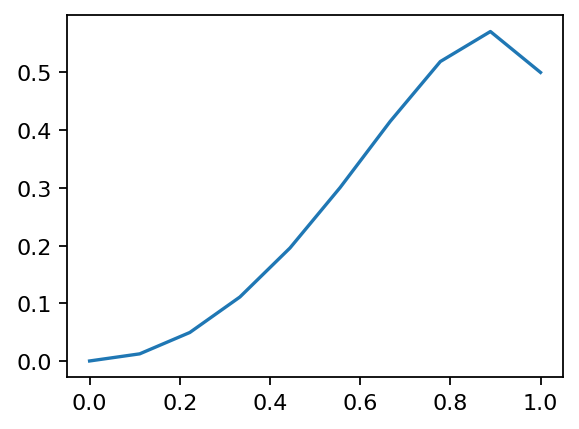

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
figure(figsize=(4, 3), dpi=160)

x = np.linspace(0, 1, 10)
y = x**2 - 0.5*x**7

plt.plot(x, y)

Имеем 10 точек какого-то многочлена. Построим интерполяционный многочлен 9 степени (Напоминаю, что $L_n(x)$ строится по $n+1$ точке) по этому набору точек.

In [ ]:
import sympy as smp
from sympy.polys.polyfuncs import interpolate

t = smp.Symbol('t')

points = [(x[i], y[i]) for i in range(len(x))] # Такой формат данных подаётся на вход interpolate

interpolate(points, t)

-6.13908923696727e-12*t**9 + 1.2732925824821e-11*t**8 - 0.500000000152795*t**7 - 1.16415321826935e-10*t**6 + 7.82165443524718e-11*t**5 - 9.09494701772928e-13*t**4 + 1.13686837721616e-12*t**3 + 1.0000000000004*t**2 - 7.99360577730113e-15*t

Видим, что получившийся многочлен очень похож на изначальный - т.е. мы действительно построили интерполяционный многочлен. Мелкие отличия связаны с конечной точностью чисел в x и y.

Построим результат на более мелкой сетке и сравним графики.

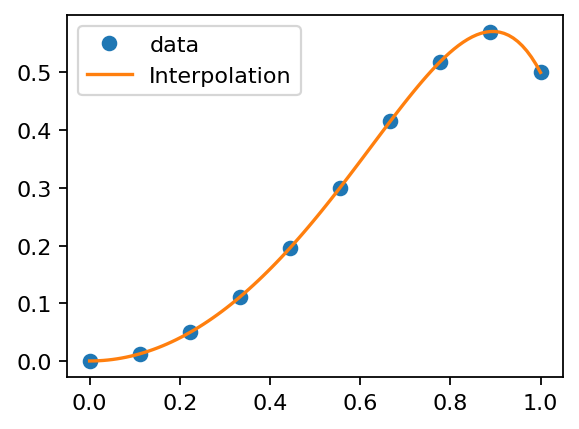

In [ ]:
f = smp.lambdify(t, interpolate(points, t), 'numpy') # Сделаем python функцию из нашего многочлена

xnew = np.linspace(0, 1, 100)

figure(figsize=(4, 3), dpi=160)

plt.plot(x, y, 'o', xnew, f(xnew), '-')
plt.legend(['data', 'Interpolation'], loc = 'best')
plt.show()

Т.е. мы смогли точно найти все промежуточные значения многочлена по 10 точкам.

### Практическая интерполяция с помощью scipy


На практике, когда хотят как-то определить промежуточные значения функции, заданной на сетке $\{ (x_i, y_i) \}_{i=0}^{n}$, хреначить сразу же многочлен $n$-ой степени - очень плохая идея. Возникает ситуация схожая с переобучением:

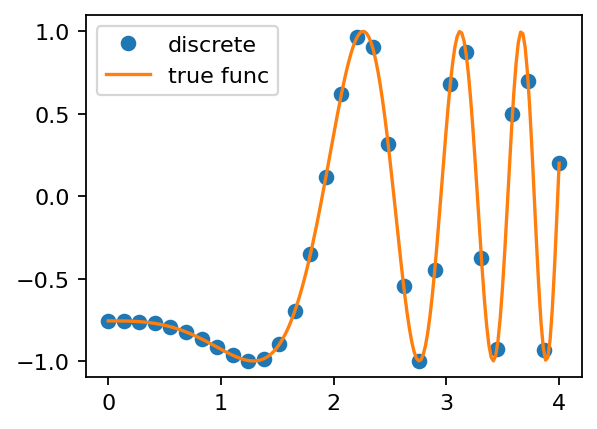

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 4, 30)
y = np.sin(x**3/3+4)

x_dens = np.linspace(0, 4, 200)
y_dens = np.sin(x_dens**3/3+4)

figure(figsize=(4, 3), dpi=160)

plt.plot(x, y, 'o', x_dens, y_dens, '-')
plt.legend(['discrete', 'true func'], loc = 'best')
plt.show()

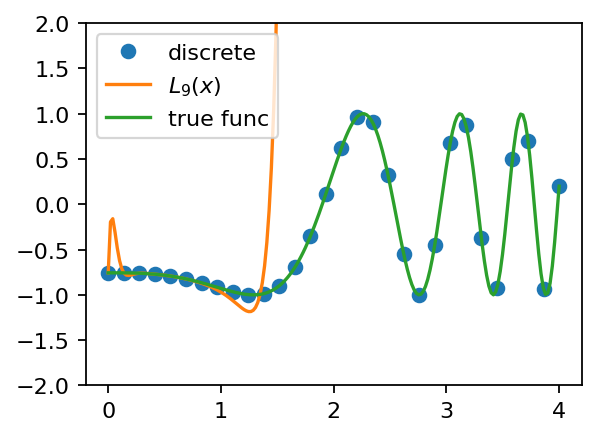

In [ ]:
import sympy as smp
from sympy.polys.polyfuncs import interpolate

points = [(x[i], y[i]) for i in range(len(x))] # Такой формат данных подаётся на вход interpolate

f = smp.lambdify(t, interpolate(points, t), 'numpy') # Сделаем python функцию из нашего многочлена

figure(figsize=(4, 3), dpi=160)

plt.plot(x, y, 'o', x_dens, f(x_dens), '-', x_dens, y_dens, '-')
plt.legend(['discrete', '$L_9(x)$', 'true func'], loc = 'best')

plt.ylim((-2, 2))
plt.show()

Ошибки накопились до критического уровня, и наша интерполяция не дала ничего разумного. Как жить?

Самый простой выход из ситуации - использовать интерполяционный многочлен __меньшей__ степени на своём наборе точек.

К примеру, будет интерполировать параболой. Разобъём весь набор точек на тройки, и на каждой тройке проинтерполируем параболой. Итоговая интерполяция будет кусочно-заданная функция, на каждом интервале которой будет нарисована соответствующая парабола.

Такая штука является самым простым __сплайном__. Для большей точности могли бы гладко склеивать полиномы в их точках соприкосновения, но об этом позже.

Создадим данные и посмотрим, как можно выполнить такую интерполяцию с помощью пакета __scipy.interpolate__:

In [ ]:
from scipy import interpolate

f1 = interpolate.interp1d(x, y, kind = 'linear') # Определяем вид интерполяции, т.е. какой многочлен использовать

f2 = interpolate.interp1d(x, y, kind = 'cubic')

Используя функцию interp1d, мы создали две __функции__ f1 и f2. Третий аргумент говорит, какой степени интерполяцию проводить - можно было закинуть и просто число.

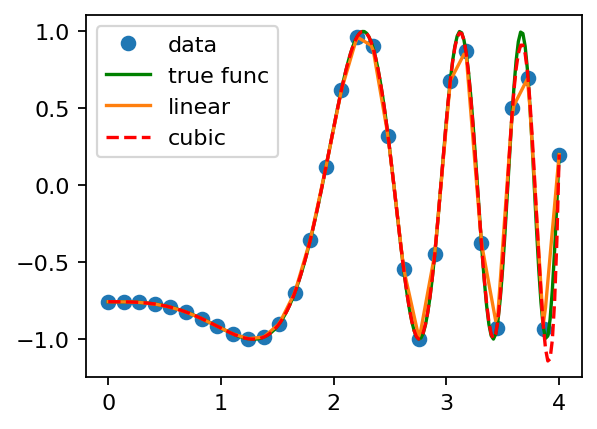

In [ ]:
figure(figsize=(4, 3), dpi=160)
plt.plot(x, y, 'o', x_dens, y_dens, 'g-', x_dens, f1(x_dens), '-', x_dens, f2(x_dens), 'r--')
plt.legend(['data','true func', 'linear', 'cubic'], loc = 'best')
plt.show()

Видим, что очень даже неплохо всё получилось.

Т.е. __интерполяцию вполне себе можно применять для приближения функции кусочно-заданным многочленом__.

Дальше я не редактировал, но можете почитать - позновательно. Основные моменты выданы выше.

### Пример аппроксимации формулой Тейлора и порядок аппроксимации




С помощью scipy можно вычислить аппроксимацию любой функции по формуле Тейлора. Говорят, что функция g является аппроксимацией порядка N другой функции $f$ в окрестности некоторой точки $х_0$, если:

$$f(x) - g(x) =  O((x-x_0)^N)$$

Это означает, что существует некоторая константа C такая, что для любого х верно неравенство:

$$|f(x) - g(x)| \leq C*((x-x_0)^N)$$

Вычислим ниже аппроксимацию синуса разных порядков:


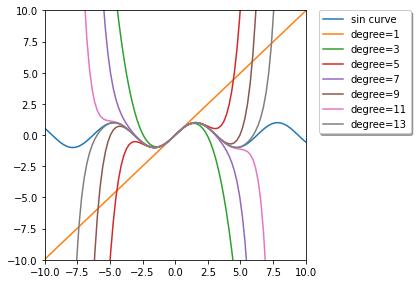

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import approximate_taylor_polynomial

x = np.linspace(-10.0, 10.0, num=100)
plt.plot(x, np.sin(x), label="sin curve")

for degree in np.arange(1, 15, step=2):
    sin_taylor = approximate_taylor_polynomial(np.sin, 0, degree, 1,
                                               order=degree + 2)
    plt.plot(x, sin_taylor(x), label=f"degree={degree}")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           borderaxespad=0.0, shadow=True)
plt.tight_layout()
plt.axis([-10, 10, -10, 10])
plt.show()

### **Ошибки усечения и округления, ограничения на порядок аппроксимации**


__Ошибка усечения__ — это верхняя граница разницы между функцией и её аппроксимацией. Эта ошибка определяется тем, что для приближения функции нельзя использовать бесконечное число операций: разложение в ряд должно быть усечено до некоторого порядка. В случае интерполяционного полинома:

\begin{aligned}
&\varepsilon_{T}=\sup |f(x)-P(x)|=h^{n} \frac{M}{n !} \\
&h=\left|x_{n}-x_{1}\right|, \quad M=\sup \left|f^{(n)}(x)\right|
\end{aligned}


Эта ошибка определяется тем, что для приближения функции нельзя использовать бесконечное число операций: разложение в ряд должно быть усечено до некоторого порядка. Проиллюстрируем это примером:  

Пусть необходимо проинтерполировать функцию  y = x^(1/3) для х = 8.

$$y(0) = 0,  y(1) = 1,  y(27) = 3$$
$$n = 3, y(8) = -5.61$$

Получили неправильное значение. Линейная интерполяция даёт результат, близкий к правильному: $y(8) = 1.54$.  

Чтобы этой проблемы не возникало, нужно брать достаточно мелкую сетку — при фиксированном порядке аппроксимации при дальнейшем уменьшении шага сетки полученные результаты изменялись незначительно. С повышением порядка аппроксимации, к тому же, требуемый шаг сетки может уменьшаться.

### Интерполяционный полином Эрмита и сплайны


Чтобы построить гладкую функцию, используют __интерполяционным полином Эрмита__. Обычный интерполяционный полином нередко выдаёт большое количество экстремумов, которых нет в исходной функции.

В ряде случаев требуется, чтобы в узлах интерполяции совпадали не только значения функции и интерполяционного многочлена, но их производные до определённого порядка, т.е. выполнялись равенства $f_{x}^{(k)}\left(x_{i}\right)=\left[H_{m}\left(x_{i}\right)\right]_{x}^{(k)}, i=\overline{0, n}, k=\overline{0, \alpha_{i}-1}$, где $\alpha_{i}-$ кратность узла $x_{i} .$ Алгебраический многочлен степени не выше $m=\alpha_{0}+\alpha_{1}+\cdots+\alpha_{n}-1$, удовлетворяющий этим условиям, называется интерполяционным многочленом Эрмитa $H_{m}$. Он может иметь следующее представление:

$$
H_{m}(x)=\sum_{i=0}^{n} \sum_{j=0}^{a_{i}-1} \sum_{k=0}^{a_{i}-j-1} \frac{f_{i}^{(j)}}{k ! j !}\left[\frac{\left(x-x_{i}\right)^{\alpha_{i}}}{\left(x-x_{0}\right)^{\alpha_{0}} \ldots\left(x-x_{n}\right)^{\alpha_{n}}}\right]_{x=x_{i}}^{(k)} \frac{\left(x-x_{0}\right)^{\alpha_{0}} \ldots\left(x-x_{n}\right)^{\alpha_{n}}}{\left(x-x_{i}\right)^{\alpha_{i}-j-k}} .
$$

Остаточный многочлен для интерполяционного многочлена Эрмита имеет вид

 $$R_{m}(x)=\frac{f_{x}^{(m+1)}(\xi)}{(m+1) !}\left(x-x_{0}\right)^{\alpha_{0}} \cdots\left(x-x_{n}\right)^{\alpha_{n}},$$ где $\xi \in\left(x_{0}, x_{n}\right)$.


__Полиноминальный сплайн__ — функция, область определения которой разбита на конечное число отрезков, на каждом из которых она совпадает с некоторым полиномом. Максимальная из степеней использованных полиномов называется степенью сплайна. Разность между степенью сплайна и получившейся гладкостью называется дефектом сплайна.

Кубический сплайн дефекта 1 — это функция, которая на каждом отрезке представляет собой полином не выше третьего порядка, имеет непрерывные первую и вторую производные, а в каждом узле интерполяции точно совпадает с аппроксимируемой функцией или эмпирической зависимостью.

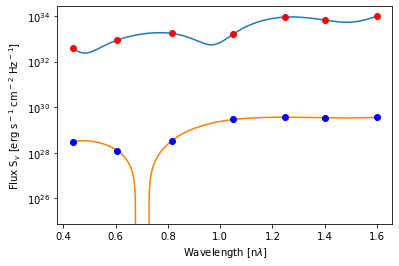

In [ ]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt


W = np.array([0.435,0.606,0.814,1.05,1.25,1.40,1.60])
sum_all = np.array([  3.87282732e+32,   8.79993191e+32,   1.74866333e+33,   1.59946687e+33,
   9.08556547e+33,   6.70458731e+33,   9.84832359e+33])
sum_can = np.array([  2.98381061e+28,   1.26194810e+28,   3.30328780e+28,   2.90254609e+29,
   3.65117723e+29,   3.46256846e+29,   3.64483736e+29])

fall = CubicSpline(W,sum_all)
newallx=np.arange(0.435,1.6,0.001)
newally=fall(newallx)



fcan = CubicSpline(W,sum_can)
newcanx=np.arange(0.435,1.6,0.001)
newcany=fcan(newcanx)



#----plot



plt.plot(newallx,newally)
plt.plot(newcanx,newcany)
plt.plot(W,sum_all,marker='o',color='r',linestyle='')
plt.plot(W,sum_can,marker='o',color='b',linestyle='')
plt.yscale("log")
plt.ylabel("Flux S$_v$ [erg s$^-$$^1$ cm$^-$$^2$ Hz$^-$$^1$]")
plt.xlabel("Wavelength [n$\lambda$]")
plt.show()


Здесь показана довольно типичная ошибка, которая появляется при подобной обработке данных. Сплайн проходит ниже 0, что не определено в масштабе шкалы.

Поэтому вместо этого сначала берут логарифм данных и выполняют сплайн-интерполяцию по логарифмически масштабированным данным. В результате получается довольно гладкая кривая, проходящая через исходные точки.

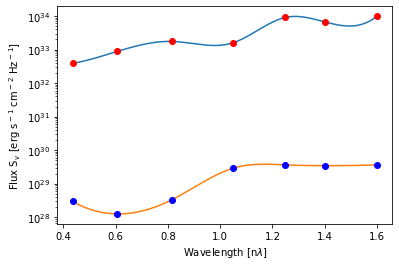

In [ ]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt


W = np.array([0.435,0.606,0.814,1.05,1.25,1.40,1.60])
sum_all = np.array([  3.87282732e+32,   8.79993191e+32,   1.74866333e+33,   1.59946687e+33,
   9.08556547e+33,   6.70458731e+33,   9.84832359e+33])
sum_can = np.array([  2.98381061e+28,   1.26194810e+28,   3.30328780e+28,   2.90254609e+29,
   3.65117723e+29,   3.46256846e+29,   3.64483736e+29])



fall = CubicSpline(W,np.log10(sum_all))
newallx=np.arange(0.435,1.6,0.001)
newally=fall(newallx)



fcan = CubicSpline(W,np.log10(sum_can))
newcanx=np.arange(0.435,1.6,0.01)
newcany=fcan(newcanx)



plt.plot(newallx,10**newally)
plt.plot(newcanx,10**newcany)
plt.plot(W,sum_all,marker='o',color='r',linestyle='')
plt.plot(W,sum_can,marker='o',color='b',linestyle='')
plt.yscale("log")



plt.ylabel("Flux S$_v$ [erg s$^-$$^1$ cm$^-$$^2$ Hz$^-$$^1$]")
plt.xlabel("Wavelength [n$\lambda$]")
plt.show()


### **Полиномы Чебышева**


Полином Чебышева — это многочлен степени $n$, старший коэффициент которых равен $2^{n-1} $, и который меньше всего отклоняется от нуля. Вычисление полиномов Чебышева, их коэффициентов и корней реализовано в numpy.

In [ ]:
import numpy as np

cheb = np.polynomial.chebyshev.Chebyshev((0,0,0,0,0,1))
coef = np.polynomial.chebyshev.cheb2poly(cheb.coef)

print(coef)
# [  0.,   5.,   0., -20.,   0.,  16.]

[  0.   5.   0. -20.   0.  16.]


Чтобы превратить эти коэффициенты в объект Polynomial, теперь просто нужно передать массив конструктору Polynomial:



In [ ]:
poly = np.polynomial.Polynomial(coef)


### **Устранение шума из данных***

Пусть необходимо устранить шум из экспериментальных данных, вызванный погрешностями измерений.

Схожая задача: требуется записать звук, а потом прослушать. Для этого сначала нужно преобразовать аналоговый сигнал в цифровой, сохранить его, а потом воспроизвести. Воспроизводящее устройство должно превратить цифровой сигнал в аналоговый, а это осуществляется с помощью интерполяции.

Центральной теоремой всего цифрового анализа сигналов является __теорема Котельникова__. Если сигнал с ограниченным спектром дискретизовать с частотой $f_{\text {д }}>2 f_{0}$, где $f_{0}-$ максимальная частота сигнала, то он может быть точно восстановлен по его дискретным значениям, отсчитанным через интервал времени $T=\frac{1}{2 f_{A}}$, путём интерполяции функциями вида $\frac{\sin (\pi t)}{(\pi t)}$ по формуле

$$
x(t)=\sum_{-\infty}^{+\infty} x[n] \cdot \frac{\sin (\pi[t-n T] / T)}{\pi(t-n T) / T}
$$


Для
восстановления аналогового сигнала по его дискретным отсчетам из спектра
дискретного сигнала с помощью идеального прямоугольного частотного
фильтра необходимо выделить область, соответствующую спектру
аналогового сигнала.

Все сигналы можно разделить на четыре группы:

 - аналоговый – описывается непрерывной функцией времени;

 - дискретный — представляется в виде последовательности значений, взятых в дискретные моменты времени, которые называются отсчётами;

 - квантованные — принимают ряд конечных значений из диапазона непрерывных или дискретных величин;

 - цифровые — получаются из аналоговых с помощью операций дискретизации и квантования по уровню.

Дискретной последовательностью называется математическая модель дискретного сигнала, представляющая собой решетчатую функцию: $x(nT) = x(n)$, где $T$ – интервал дискретизации, $n = 0, 1, 2, ..., N-1$ - отсчёты или сэмплы.

Пример конечной дискретной последовательности: $x(nT) = {2, 1, -2, 0, 2, 3, 1, -1, 0, ...}$

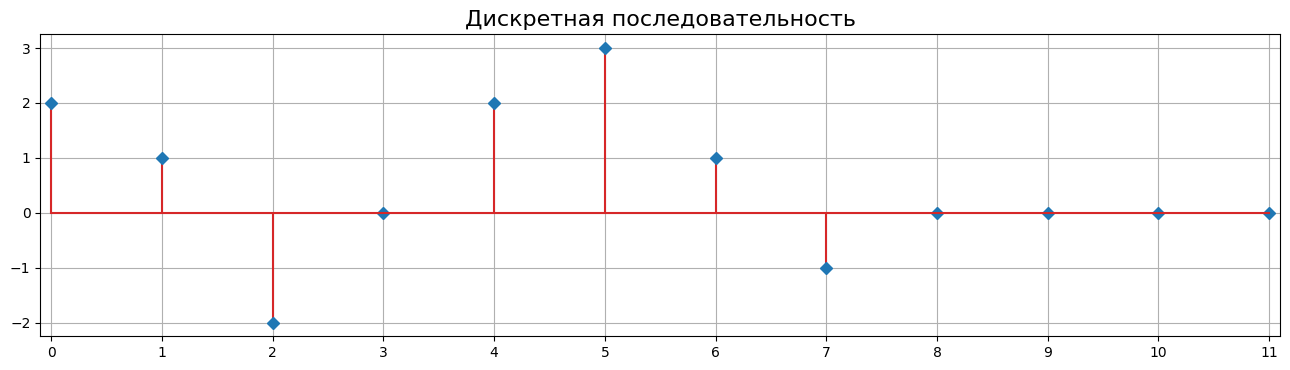

In [ ]:
# Digital signal
xt = np.array([2, 1, -2, 0, 2, 3, 1, -1, 0, 0, 0, 0])
# Time vector
t = np.linspace(0, xt.size-1, xt.size, endpoint=True)

# Plot figure
fig = plt.figure(figsize=(16, 4), dpi=100)
plt.title('Дискретная последовательность', fontsize=16)
plt.stem(t, xt, linefmt='C3', markerfmt='D', use_line_collection=True)
plt.xticks(t)
plt.xlim([np.min(t)-0.1, np.max(t)+0.1])
plt.grid(True)


Дискретные последовательности очень удобно описывать с помощью Z-формы или Z-преобразований. Для последовательности $x(nT)$ одностороннее Z-преобразование определяется следующим рядом:
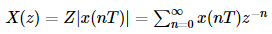


После Z-преобразования полученный сигнал умножается на некоторую функцию, которая называется фильтром, а затем производят обратное z-преобразование. Пример применения фильтра Баттерворта с разным значением его параметра для одного и того же зашумлённого сигнала:  

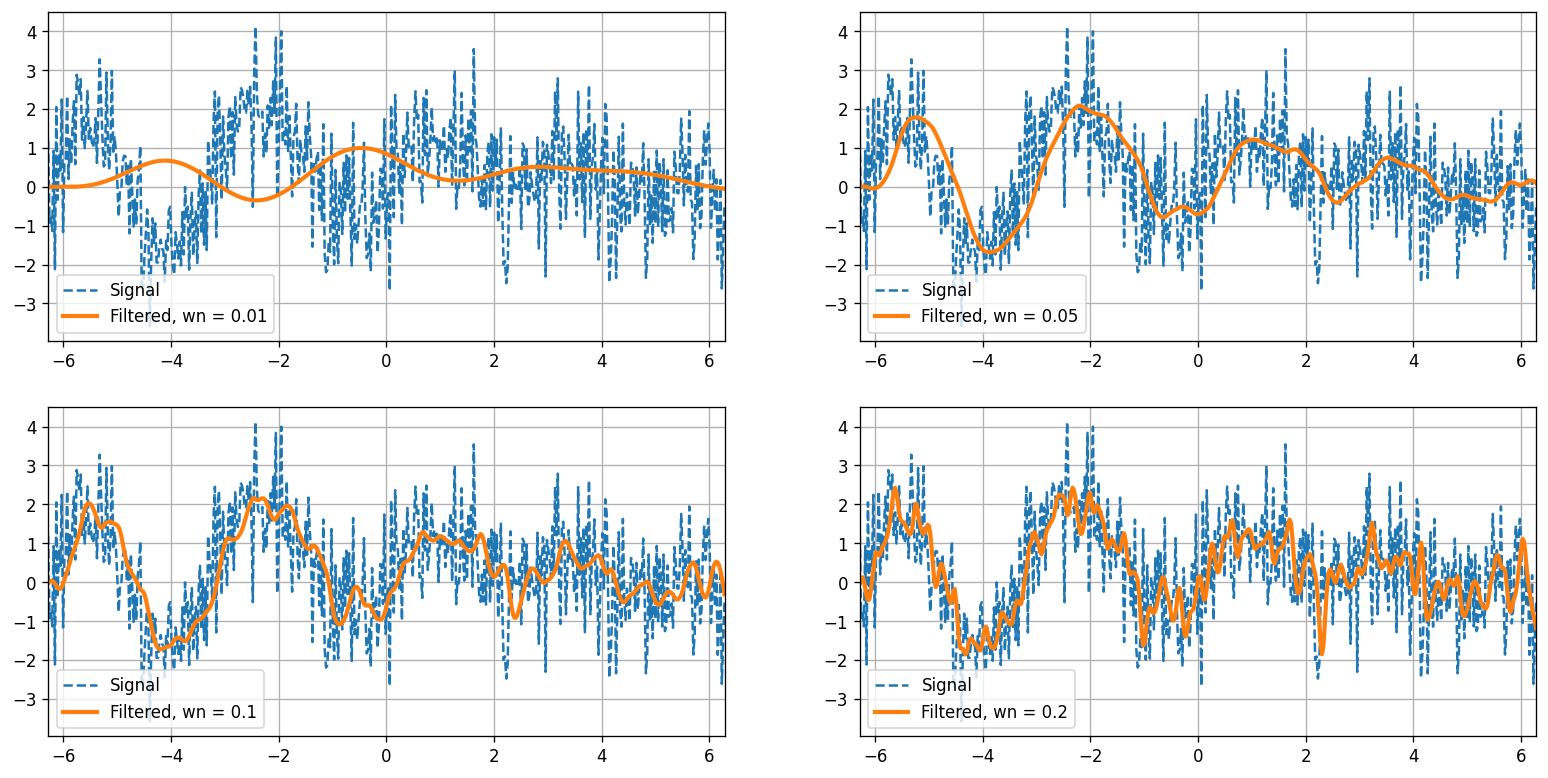

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz, butter, firls, remez, firwin, firwin2, group_delay
from scipy.fftpack import fft, fftshift

# Create input signal
t = 2 * np.pi * np.linspace(-1, 1, 500)
x = np.sin(0.25*t*t)+ 0.95*np.sin(2.0*t)

# Add some white noise
np.random.seed(1)
xn = x + np.random.randn(len(t))

# 3-order lowpass butterworth filter
b, a = butter(3, 0.2)
z = lfilter(b, a, xn)

wn = [0.01, 0.05, 0.1, 0.2]

# Calculate IIR filter
zz = np.zeros((t.size, 4))
for i in range(4):
    b, a = butter(3, wn[i])
    zz[:, i] = lfilter(b, a, xn)

# Plot results
plt.figure(figsize=(16, 8), dpi=120)
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(t, xn, 'C0--', linewidth=1.5)
    plt.plot(t, zz[:,i], 'C1', linewidth=2.5)
    plt.xlim([-2 * np.pi, 2 * np.pi])
    plt.grid(True)
    plt.legend(('Signal', 'Filtered, wn = {}'.format(wn[i])), loc='lower left')


### **Интерполяция и экстраполяция аналитической функции и её производных***

Ряд физических задач требуют решения интегральных или интегро-дифференциальных уравнений, которые удобно решать методом итераций

$$y_{n+1}(x)=F\left(x ; y_{n}(x), y_{n}^{\prime}(x), y_{n}^{\prime \prime}(x), \ldots\right)  \ \ \ \ (1)
$$

где $F\left(x ; y(x), y^{\prime}(x), y^{\prime \prime}(x), \ldots\right)$ — функционал от $y(x), y^{\prime}(x), y^{\prime \prime}(x), \ldots$, который зависит также от параметра x,

$n=0,1,2$ - номер итерации, а начальные функции $y_{0}(x), y_{0}^{\prime}(x), y_{0}^{\prime \prime}(x), \ldots$ пусть заданы.

Уравнения типа (1) удобно решать на сетке $x=x_{j}, j \in Z-$ целое, вычисляя правую часть (1) последовательно для каждого $x_{j}$ при каждом следующем значении $n . \mathrm{B}$ связи с этим возникает необходимость решения задачи о численном нахождении функции $f(x)$ и ее производных $f^{(k)}(x)$ за пределами точек сетки $\left(x \neq x_{j} \forall j\right)$ по известным значениям функции на сетке $f\left(x_{j}\right), j \in Z .$

Решение:

Пусть функция $f(x)$ аналитична и задана на сетке $x_{j}, j \in Z$ - целое, как $f\left(x_{j}\right)=y_{j}$ с ошибкой $\Delta y_{j}$. Сетка может быть как эквидистантной $x_{j}=j \Delta x, \Delta x>0-$ шаг, так и неэвидистантной $x_{j}=x\left(t_{j}\right)$, где значения $t_{j}=j \Delta t-$ эквидистантны, $\Delta t>0 .$ При этом мы полагаем, что функция $x(t)$ аналитична и представляет собой несложное аналитическое выражение, которое легко обращается и дифференцируется в аналитическом виде.

Целью настоящей разработки является численное нахождение следующих величин:

a) Значения функции $f(x)$ в промежуточных точках $x_{j}<x<$ $x_{j+1}$ между точками сетки.

б) Значения производных $f^{\prime}(x), f^{\prime \prime}(x), \ldots$ в точках сетки $x=x_{j}$ и между точками сетки $x_{j}<x<x_{j+1}$.

в) Аналитическое продолжение функции $f(x)$ и ее производных $f^{\prime}(x), f^{\prime \prime}(x), \ldots$ в плоскость комплексных значений $x$.

г) Аналитическое продолжение функции $f(x)$ за пределы сетки (т. е. за пределы области ее прямого численного вычисления).

Случай (г) может потребоваться, например, в случае, когда в (1) функция $y(x)$ численно вычисляется на отрезке $x \in[a ; b]$, a нужно знать ее значения при некоторых $x<a$ или $x>b$.

Задачи (а)-(г) формально решаются путем разложения $f(x)$ в ряд Тейлора вблизи некоторого узла сетки $x_{j}$

$$
f^{(k)}(x)=\sum_{n=0}^{\infty} \frac{f^{(n+k)}\left(x_{j}\right)}{n !}\left(x-x_{j}\right)^{n}  \ \ \ \ (2)
$$

Здесь $x_{j}$ - ближайшая к $x$ точка сетки (т. е. $\left.0 \leq\left|x-x_{j}\right| \leq \Delta x / 2\right)$, и мы здесь полагаем сетку эквидистантной (неэквидистантные сетки будут рассмотрены ниже).

Из (2) видно, что для фактического решения задач (а)-(г) необходимо вычислить производные $f^{(n)}\left(x_{j}\right)$ в точках сетки $x_{j}$, $j \in Z$, через значения функции на сетке $y_{j}, j \in Z .$ При этом необходимо также рассчитать ошибку вычисления этих производных, которая связана как с ошибкой выражения $f^{(n)}\left(x_{j}\right), j \in Z$, через $y_{j}, j \in Z$, так и с исходной ошибкой $\Delta y_{j}$ самих $y_{j} .$ В результате, полная ошибка вычисления правой части (2) будет ограничивать значения $x$, до которых экстраполяция функции $f(x)$ и ее производных за пределы сетки численно возможна.

Для вычисления входящих в (2) производных на сетке $f^{(n)}\left(x_{j}\right)$, $j \in Z$, выразим производные $f^{(n)}(x)$ в точке $x=x_{j}$ через значения функции $f(x)$ в точках $x=x_{j}$.

В главном (нулевом) порядке по шагу $\Delta x$ для производных $f^{(n)}(x)$ имеет место следующая формула

$$
f^{(n)}(x)=\frac{1}{2^{n} \Delta x^{n}} \sum_{k=0}^{n}(-1)^{k} C_{n}^{k} f(x+(n-2 k) \Delta x)+O\left(\Delta x^{2}\right)  \  \  \  \  (3)
$$

$$
C_{n}^{k}= \begin{cases}\frac{n !}{k !(n-k) !}, & 0 \leq k \leq n, \\ 0, & k<0 \text { или } k>n\end{cases}
\ \ \ \ \ (4)
$$

 биноминальные коэффициенты, симметричность которых $C_{n}^{k}=C_{n}^{n-k}-$ обеспечивает обращение в нуль всех нечетных порядков по $\Delta x$, т. е. $O\left(\Delta x^{2 m+1}\right)=0$ в (3).

Формула (3) справедлива до $O\left(\Delta x^{2}\right)$. Нам же нужно знать производные $f^{(n)}(x)$ в произвольном порядке по шагу $\Delta x$. Чтобы их вычислить, будем последовательно итерировать (3) с помощью разложения функции $f(x)$ в ряд Тейлора

$$
f(x+a)=\sum_{n=0}^{\infty} \frac{f^{(n)}(x)}{n !} a^{n} .\ \ \ \ \ (5)
$$  

Именно, подставляя (5) в правую часть (3) при $a=(n-2 k) \Delta x$ и учитывая, что разностная схема (3) не содержит нечетных порядков по $\Delta x$, распишем входящую в правую часть (3) величину $O\left(\Delta x^{2}\right)$ до следующего порядка

$$
\begin{gathered}
O\left(\Delta x^{2}\right)=-\frac{1}{2^{n} \Delta x^{n}} \sum_{k=0}^{n}(-1)^{k} C_{n}^{k} \frac{f^{(n+2)}(x)}{(n+2) !}(n-2 k)^{n+2} \Delta x^{n+2}+ \\
\quad+O\left(\Delta x^{4}\right)= \\
=-D_{n}^{(1)} f^{(n+2)}(x)(2 \Delta x)^{2}+O\left(\Delta x^{4}\right)
\end{gathered} \ \ \ \ \ \ (6)
$$

где

$$
D_{n}^{(1)}=\sum_{k=0}^{n}(-1)^{k} C_{n}^{k} \frac{(n-2 k)^{n+2}}{2^{n+2}(n+2) !} .
$$

Подставляя в (6) производную $f^{(n+2)}(x)$ из (3), для входящей в правую часть (3) величины $O\left(\Delta x^{2}\right)$ получаем

$O\left(\Delta x^{2}\right)=\frac{1}{2^{n} \Delta x^{n}} \sum_{k=0}^{n+2}(-1)^{k-1} D_{n}^{(1)} C_{n+2}^{k} f(x+(n+2-2 k) \Delta x)+O\left(\Delta x^{4}\right) \ \ \ \ (7) $,

где учтено, что $-(-1)^{k}=(-1)^{k-1}$.

Перепишем (3), сделав замену $k \rightarrow k-1 .$

Имеем,

$f^{(n)}(x)=\frac{1}{2^{n} \Delta x^{n}} \sum_{k=1}^{n+1}(-1)^{k-1} C_{n}^{k-1} f(x+(n+2-2 k) \Delta x)+O\left(\Delta x^{2}\right)=$ $=\frac{1}{2^{n} \Delta x^{n}} \sum_{k=0}^{n+2}(-1)^{k-1} C_{n}^{k-1} f(x+(n+2-2 k) \Delta x)+O\left(\Delta x^{2}\right) \ \ \ \ (8) $


где $O\left(\Delta x^{2}\right)-$ то же самое, что и в (3) и в левой части (7) и где учтено, что $C_{n}^{k}=0$ при $k<0$ или $k>n$ (см. (4)).  

Подставляя $O\left(\Delta x^{2}\right)$ в виде (7) в формулу (8), получаем производную $f^{(n)}(x)$ с точностью до второго порядка по $\Delta x$ включительно


\begin{gathered}
f^{(n)}(x)=\frac{1}{2^{n} \Delta x^{n}} \sum_{k=0}^{n+2}(-1)^{k-1}\left(C_{n}^{k-1}+D_{n}^{(1)} C_{n+2}^{k}\right) f(x+(n+2-2 k) \Delta x)+ \\
+O\left(\Delta x^{4}\right) .
\end{gathered}


Итерируя эту процедуру далее, получаем производные $f^{(n)}(x)$ с точностью до $2 m$-го порядка включительно

$f^{(n)}(x)=\frac{1}{2^{n} \Delta x^{n}} \sum_{k=0}^{n+2 m} A_{k n}^{m} f(x+(n+2 m-2 k) \Delta x)+O\left(\Delta x^{2 m+2}\right) \ \ \ \ \ (9) $

где

$$
A_{k n}^{m}=\sum_{l=0}^{m}(-1)^{k-m} D_{n}^{(l)} C_{n+2 l}^{k-m+l} \ \ \ \ (10)
$$

 коэффициенты разложения, а

$$
D_{n}^{(j+1)}=\sum_{k=0}^{n+2 j} \sum_{l=0}^{j}(-1)^{k} D_{n}^{(l)} C_{n+2 l}^{k-j+l} \frac{(n+2 j-2 k)^{n+2 j+2}}{2^{n+2 j+2}(n+2 j+2) !} \ \ \ \ (11)
$$

 реккурентная формула для входящих в (10) величин $D_{n}^{(l)}$, в которой положено $D_{n}^{(0)} \equiv 1 .$

Формула (9) является основной вспомогательной формулой для расчета сетки для производных $f^{(n)}\left(x_{j}\right)$ в $(2)$.

Ради примера, с помощью (9) выпишем $f^{\prime}(x)$ с точностью до 0 -го, 2-го и 4-го порядка по $\Delta x$, включительно,  

\begin{gathered}
f^{\prime}(x)=\frac{f(x+\Delta x)-f(x-\Delta x)}{2 \Delta x}+O\left(\Delta x^{2}\right)= \\
=\frac{27(f(x+\Delta x)-f(x-\Delta x))-(f(x+3 \Delta x)-f(x-3 \Delta x))}{48 \Delta x}+ \\
+O\left(\Delta x^{4}\right)= \\
=\frac{1}{80 \cdot 48 \Delta x}[2250(f(x+\Delta x)-f(x-\Delta x))-125(f(x+3 \Delta x)- \\
-f(x-3 \Delta x))+9(f(x+5 \Delta x)-f(x-5 \Delta x))]+O\left(\Delta x^{6}\right) .
\end{gathered}  

Случай эквидистантной сетки.

Рассмотрим в (9) случай эквидистантной сетки: $x_{j}=j \Delta x$, $j \in Z .$ Подставляя $x=x_{j}$ в (9) и учитывая, что $f\left(x_{j}\right)=y_{j}$ (см. разд. 1) и $x_{j}+(n+2 m-2 k) \Delta x=x_{j+n+2 m-2 k}$, получаем входящие в (2) искомые выражения для производных на сетке

$$
f^{(n)}\left(x_{j}\right)=\frac{1}{2^{n} \Delta x^{n}} \sum_{k=0}^{n+2 m} A_{k n}^{m} y_{j+n+2 m-2 k}+O\left(\Delta x^{2 m+2}\right) \ \ \ \ \ (12)
$$

где коэффициенты $A_{k n}^{m}$ даются формулами (10) и (11).
Через выражения (12) для производных на сетке $f^{(n)}\left(x_{j}\right)$ peшаются по формуле (2) поставленные нами  задачи (а)-(г).



### **Вычисление факториалов по формуле Стирлинга***

Часто формулу Стирлинга записывают в виде
$$
n !=\sqrt{2 \pi n}\left(\frac{n}{e}\right)^{n} \exp \frac{\theta_{n}}{12 n}
$$
где $0<\theta_{n}<1, n>0$. Более точную оценку даёт формула
$$
n !=\sqrt{2 \pi n}\left(\frac{n}{e}\right)^{n} \exp \frac{1}{12 n+\theta_{n}}
$$
где $0<\theta_{n}<1, n>0$.
В последней формуле максимальное значение $\theta_{n}$ в действительности меньше 1 и примерно равно 0,7509.
Формула Стирлинга является приближением, полученным из разложения факториала в ряд Стирлинга, который при $n>0$ имеет вид
$$
\begin{aligned}
n ! & \sim \sqrt{2 \pi n}\left(\frac{n}{e}\right)^{n} \exp \sum_{k=1}^{\infty} \frac{B_{2 k}}{2 k(2 k-1) n^{2 k-1}}=\\
=& \sqrt{2 \pi n}\left(\frac{n}{e}\right)^{n}\left(1+\frac{1}{12 n}+\frac{1}{288 n^{2}}-\frac{139}{51840 n^{3}}-\frac{571}{2488320 n^{4}}+\cdots\right)=\\
=& \sqrt{2 \pi n}\left(\frac{n}{e}\right)^{n}\left(1+\frac{1}{\left(2^{1}\right)(6 n)^{1}}+\frac{1}{\left(2^{3}\right)(6 n)^{2}}-\frac{139}{\left(2^{3}\right)(2 \cdot 3 \cdot 5)(6 n)^{3}}-\right.\\
&\left.-\frac{571}{\left(2^{6}\right)(2 \cdot 3 \cdot 5)(6 n)^{4}}+\cdots\right)
\end{aligned}
$$
где $B_{j}$ - числа Бернулли с номером $j$.